In [1]:
import numpy as np
import math
import csv
import glob
import pandas as pd
from matplotlib import pyplot
from IPython.display import HTML, display
%matplotlib inline 

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 14

In [3]:
############ Get Data from CSV File ########### 
def dataGet(data_file):    ## Simulation Data
    global data   
    raw=open(data_file)
    get_csv=csv.reader(raw)
    data = []
    for line in get_csv:
        data.append(line) 
    return data

def dataClean():
    data_file=glob.glob('*.csv')
    temp = []
    for file in data_file:
        data = dataGet(file);
        name_file=file.rsplit('.',1)[0]; 
        print(name_file)
        data_t = np.transpose(data)
        data_Temp = data_t[1]
        data_time = data_t[0]
        i = 0;
        buffer = []
        buffer_time = []
        position.append('FILE: '+ name_file)
        for time in data_time:
            buffer.append(data_Temp[i])
            buffer_time.append(data_time[i])
            if time == "[Name]":
                buffer_time = buffer_time[4:len(buffer_time)-3]
                buffer_time = [float(item) for item in buffer_time]    
                Timesteps.append(buffer_time)
                
                buffer = buffer[4:len(buffer)-3]
                buffer = [float(item) for item in buffer]    
                Temp.append(buffer)
                
                buffer_diff = [np.abs(item-298.15) for item in buffer]  
                Temp_diff.append(buffer_diff)
                
                position.append(data_time[i+1])
                buffer = []
                buffer_time = []
            i+=1        
        buffer_time = buffer_time[4:-1]
        buffer_time = [float(item) for item in buffer_time]    
        Timesteps.append(buffer_time)        
        buffer = buffer[4:-1]
        buffer = [float(item) for item in buffer]    
        Temp.append(buffer)
        buffer_diff = [item-298.15 for item in buffer]  
        Temp_diff.append(buffer_diff)
    return Temp,Temp_diff,position,Timesteps
# Plots
def resultPlots(title,time_center,temp_center,time_nextCoil12,temp_nextCoil12,time_outlet,temp_outlet):
    pyplot.title(title)
    pyplot.xlabel('time [s]')
    pyplot.ylabel('Temperature Rise')
    pyplot.plot(time_center, temp_center, label='center')
    pyplot.plot(time_nextCoil12, temp_nextCoil12, label='nextCoil12')
    pyplot.plot(time_outlet, temp_outlet, label='outlet')
    pyplot.plot(time_ExpP1W-3.5, diff_Temp_ExpP1W, color='darkgreen', linestyle='-', linewidth=2)
    pyplot.xlim([0,17.5])
    return 
# Plots
def resultPlotsExp(title,time,temp):
    pyplot.title(title)
    pyplot.xlabel('time [s]')
    pyplot.ylabel('Temperature Rise')
    pyplot.plot(time, temp, color='darkgreen', linestyle='-', linewidth=2)
    return 

## Experiments

In [4]:
data_Exp1W_05lm = pd.read_csv('data_exp/exp_1W_0.5LPM.csv')  # Power 1 Watt, Airflow 0.5 L/min
data_Exp1W_05lm.tail()
data_time = data_Exp1W_05lm['Time']
# data_Exp1W_05lm.tail()
data_Exp1W_05lm_T1 = [data_Exp1W_05lm['T1_t1'],data_Exp1W_05lm['T1_t2'],data_Exp1W_05lm['T1_t3']]
data_Exp1W_05lm_T2 = [data_Exp1W_05lm['T2_t1'],data_Exp1W_05lm['T2_t2'],data_Exp1W_05lm['T2_t3']]
data_Exp1W_05lm_T3 = [data_Exp1W_05lm['T3_t1'],data_Exp1W_05lm['T3_t2'],data_Exp1W_05lm['T3_t3']]
data_Exp1W_05lm_T4 = [data_Exp1W_05lm['T4_t1'],data_Exp1W_05lm['T4_t2'],data_Exp1W_05lm['T4_t3']]

In [5]:
data_exp1W_165lm = pd.read_csv('data_exp/Exp_1W_1.65LPM.csv') #Power 1 Watt, Airflow 1.65 L/min

In [6]:
### For plotting purposes, Average values with +-2 standard deviations 
i = 75 #Start here because there are a lot of power off values. 
average0,average1,average2,average4 = [],[],[],[]
upperbound0,upperbound1,upperbound2,upperbound4 = [],[],[],[]
lowerbound0,lowerbound1,lowerbound2,lowerbound4 = [],[],[],[]
sDev0,sDev1,sDev2,sDev4 = [],[],[],[]
while i < 150:
    a4 = [data_Exp1W_05lm_T4[0][i],data_Exp1W_05lm_T4[1][i],data_Exp1W_05lm_T4[2][i]] #4mm
    a2 = [data_Exp1W_05lm_T1[0][i],data_Exp1W_05lm_T1[1][i],data_Exp1W_05lm_T1[2][i]] #2mm
    a1 = [data_Exp1W_05lm_T3[0][i],data_Exp1W_05lm_T3[1][i],data_Exp1W_05lm_T3[2][i]] #1mm    average.append(np.average(a)) 
    a0 = [data_Exp1W_05lm_T2[0][i],data_Exp1W_05lm_T2[1][i],data_Exp1W_05lm_T2[2][i]] #center
    average0.append(np.average(a0))
    average1.append(np.average(a1))
    average2.append(np.average(a2))
    average4.append(np.average(a4))
#     upperbound0.append(np.average(a0)+2*np.std(a0))
#     upperbound1.append(np.average(a1)+2*np.std(a1))
#     upperbound2.append(np.average(a2)+2*np.std(a2))
#     upperbound4.append(np.average(a4)+2*np.std(a4))
#     lowerbound0.append(np.average(a0)-2*np.std(a0))
#     lowerbound1.append(np.average(a1)-2*np.std(a1))
#     lowerbound2.append(np.average(a2)-2*np.std(a2))
#     lowerbound4.append(np.average(a4)-2*np.std(a4))
    sDev0.append(np.std(a0))
    sDev1.append(np.std(a1))
    sDev2.append(np.std(a2))
    sDev4.append(np.std(a4))
    i +=1

In [7]:
# Take the largest standard deviation and apply that across all averages 
plus0=average0 + max(sDev0)
plus1=average1 + max(sDev1)
plus2=average2 + max(sDev2)
plus4=average4 + max(sDev4)
minus0=average0 - max(sDev0)
minus1=average1 - max(sDev1)
minus2=average2 - max(sDev2)
minus4=average4 - max(sDev4)

# Experiments

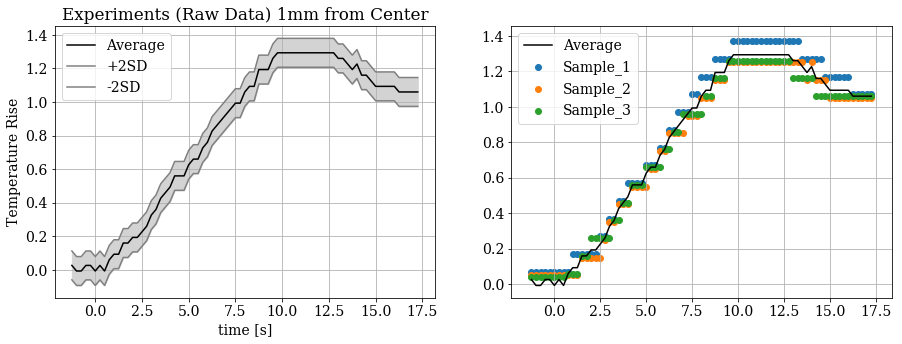

In [8]:
pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.title('Experiments (Raw Data) 1mm from Center')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(data_time[75:150]-20, average1,linestyle='-',label="Average",color="black")
pyplot.plot(data_time[75:150]-20, plus1,linestyle='-',label="+2SD",color="gray")
pyplot.plot(data_time[75:150]-20, minus1,linestyle='-',label="-2SD",color="gray")
pyplot.fill_between(data_time[75:150]-20,plus1, minus1, color="lightgray")
# pyplot.plot(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[0])[75:150],linestyle='-',label="Sample_1")
# pyplot.plot(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[1])[75:150],linestyle='-',label="Sample_2")
# pyplot.plot(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[2])[75:150],linestyle='-',label="Sample_3")
pyplot.legend()
pyplot.grid()
pyplot.subplot(1, 2, 2)
pyplot.plot(data_time[75:150]-20, average1,linestyle='-',label="Average",color="black")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T3[0])[75:150],label="Sample_1")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T3[1])[75:150],label="Sample_2")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T3[2])[75:150],label="Sample_3")
pyplot.legend()
pyplot.grid()

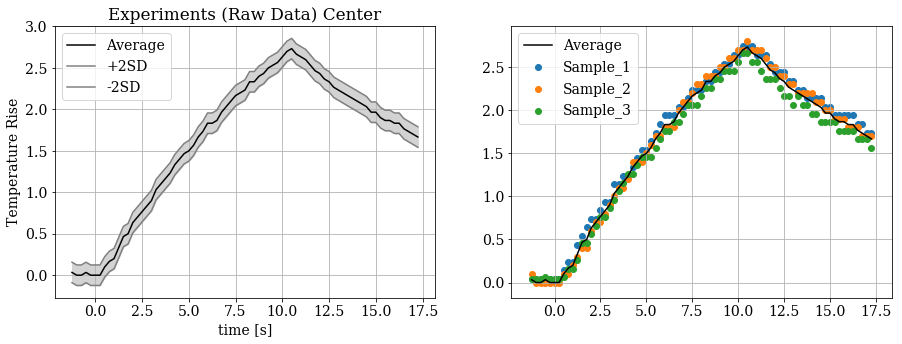

In [9]:
pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.title('Experiments (Raw Data) Center')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(data_time[75:150]-20, average0,linestyle='-',label="Average",color="black")
pyplot.plot(data_time[75:150]-20, plus0,linestyle='-',label="+2SD",color="gray")
pyplot.plot(data_time[75:150]-20, minus0,linestyle='-',label="-2SD",color="gray")
pyplot.fill_between(data_time[75:150]-20,plus0, minus0, color="lightgray")
# pyplot.plot(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T2[0])[75:150],linestyle='-',label="Sample_1")
# pyplot.plot(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T2[1])[75:150],linestyle='-',label="Sample_2")
# pyplot.plot(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T2[2])[75:150],linestyle='-',label="Sample_3")
pyplot.legend()
pyplot.grid()
pyplot.subplot(1, 2, 2)
pyplot.plot(data_time[75:150]-20, average0,linestyle='-',label="Average",color="black")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T2[0])[75:150],label="Sample_1")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T2[1])[75:150],label="Sample_2")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T2[2])[75:150],label="Sample_3")
pyplot.legend()
pyplot.grid()

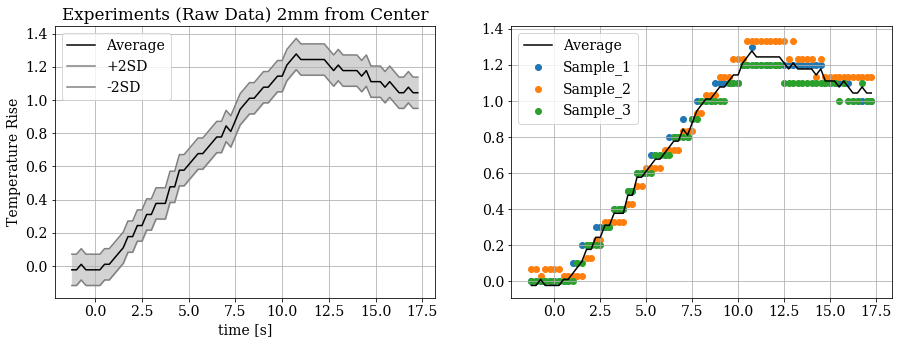

In [10]:
pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.title('Experiments (Raw Data) 2mm from Center')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(data_time[75:150]-20, average2,linestyle='-',label="Average",color="black")
pyplot.plot(data_time[75:150]-20, plus2,linestyle='-',label="+2SD",color="gray")
pyplot.plot(data_time[75:150]-20, minus2,linestyle='-',label="-2SD",color="gray")
pyplot.fill_between(data_time[75:150]-20,plus2, minus2, color="lightgray")
# pyplot.plot(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[0])[75:150],linestyle='-',label="Sample_1")
# pyplot.plot(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[1])[75:150],linestyle='-',label="Sample_2")
# pyplot.plot(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[2])[75:150],linestyle='-',label="Sample_3")
pyplot.legend()
pyplot.grid()
pyplot.subplot(1,2,2)
pyplot.plot(data_time[75:150]-20, average2,linestyle='-',label="Average",color="black")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[0])[75:150],label="Sample_1")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[1])[75:150],label="Sample_2")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[2])[75:150],label="Sample_3")
pyplot.legend()
pyplot.grid()

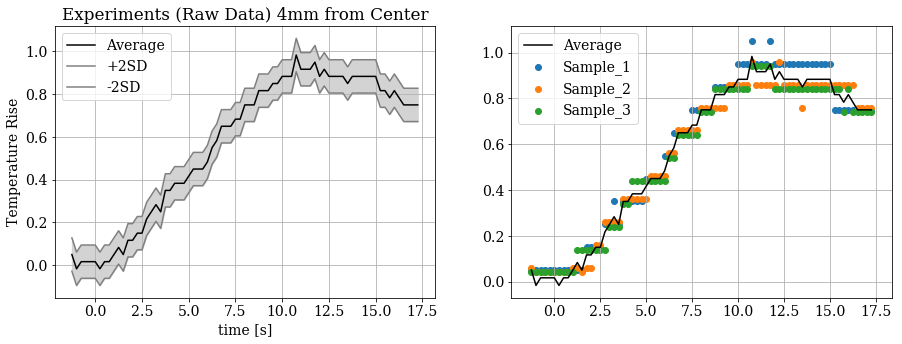

In [11]:
pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.title('Experiments (Raw Data) 4mm from Center')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(data_time[75:150]-20, average4,linestyle='-',label="Average",color="black")
pyplot.plot(data_time[75:150]-20, plus4,linestyle='-',label="+2SD",color="gray")
pyplot.plot(data_time[75:150]-20, minus4,linestyle='-',label="-2SD",color="gray")
pyplot.fill_between(data_time[75:150]-20,plus4, minus4, color="lightgray")
# pyplot.plot(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[0])[75:150],linestyle='-',label="Sample_1")
# pyplot.plot(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[1])[75:150],linestyle='-',label="Sample_2")
# pyplot.plot(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[2])[75:150],linestyle='-',label="Sample_3")
pyplot.legend()
pyplot.grid()
pyplot.subplot(1,2,2)
pyplot.plot(data_time[75:150]-20, average4,linestyle='-',label="Average",color="black")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[0])[75:150],label="Sample_1")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[1])[75:150],label="Sample_2")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[2])[75:150],label="Sample_3")
pyplot.legend()
pyplot.grid()

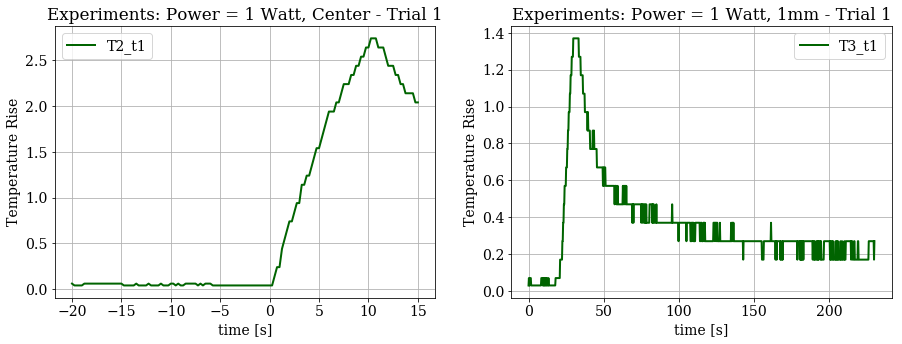

In [12]:
pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
resultPlotsExp('Experiments: Power = 1 Watt, Center - Trial 1', data_time[0:141]-20, np.abs(data_Exp1W_05lm_T2[0])[0:141])
pyplot.legend()
pyplot.grid()
pyplot.subplot(1, 2, 2)
resultPlotsExp('Experiments: Power = 1 Watt, 1mm - Trial 1', data_time, np.abs(data_Exp1W_05lm_T3[0]))
pyplot.legend()
pyplot.grid()

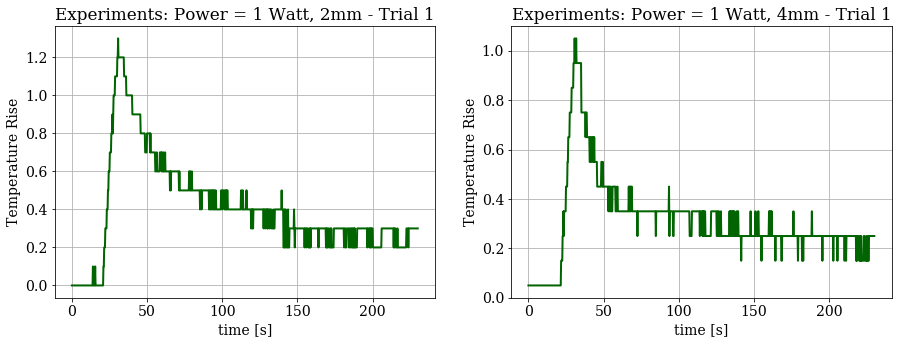

In [13]:
pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
resultPlotsExp('Experiments: Power = 1 Watt, 2mm - Trial 1', data_time, np.abs(data_Exp1W_05lm_T1[0]))
pyplot.grid()
pyplot.subplot(1, 2, 2)
resultPlotsExp('Experiments: Power = 1 Watt, 4mm - Trial 1', data_time, np.abs(data_Exp1W_05lm_T4[0]))
pyplot.grid()

# Simulation 
HAFM Full Geometry 

### Applied Power Profiles

In [137]:
dataPoweron1off02 = pd.read_csv("data_sim/power/linear_On0.5s_Off0.2s.csv")
dataPoweron1off02['t[s]'];
dataPoweron1off02['Power[W m^-3]'];
dataPoweron1off1 = pd.read_csv("data_sim/power/linear_On1s_Off1s.csv")
dataPoweron15off15 = pd.read_csv("data_sim/power/linear_On1.5s_Off1s.csv")
dataPoweron2off2 = pd.read_csv("data_sim/power/linear_On2s_Off2s.csv")
dataPoweron4off2 = pd.read_csv("data_sim/power/linear_On2s_Off2s.csv")

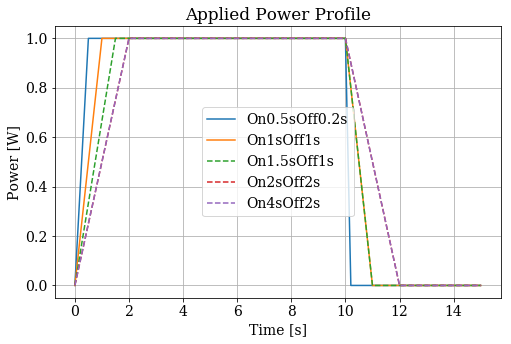

In [140]:
pyplot.figure(figsize=(8,5))
pyplot.title('Applied Power Profile')
pyplot.xlabel('Time [s]')
pyplot.ylabel('Power [W]')
pyplot.plot(dataPoweron1off02['t[s]'], dataPoweron1off02['Power[W m^-3]']/((1/13.1533)*(1e9)),label="On0.5sOff0.2s")
pyplot.plot(dataPoweron1off1['t[s]'], dataPoweron1off1['Power[W m^-3]']/((1/13.1533)*(1e9)),label="On1sOff1s")
pyplot.plot(dataPoweron15off15['t[s]'], dataPoweron15off15['Power[W m^-3]']/((1/13.1533)*(1e9)),linestyle='dashed',label="On1.5sOff1s")
pyplot.plot(dataPoweron2off2['t[s]'], dataPoweron2off2['Power[W m^-3]']/((1/13.1533)*(1e9)),linestyle='dashed',label="On2sOff2s")
pyplot.plot(dataPoweron4off2['t[s]'], dataPoweron4off2['Power[W m^-3]']/((1/13.1533)*(1e9)),linestyle='dashed',label="On4sOff2s")
pyplot.grid()
pyplot.legend(loc='center')

### Comparison with Atomizer Validation Study
Analysis comparing with applied power 1 Watt at 1.65m/s velocity profile. This comparison is for atomizer region only, 12th and last coil. This is to compare with the results from the atomizer validation study. 

In [16]:
dataSim = pd.read_csv("data_sim/data_vel165_prof.csv")
time = dataSim["Time [ s ]"]
sim_coil12Center = dataSim["coil12_Center [K]"]- 293.149994
sim_coil12nearcoil = dataSim["coil12_nearcoil [K]"]- 293.149994
sim_coil12oncoil = dataSim["coil12_oncoil [K]"]- 293.149994

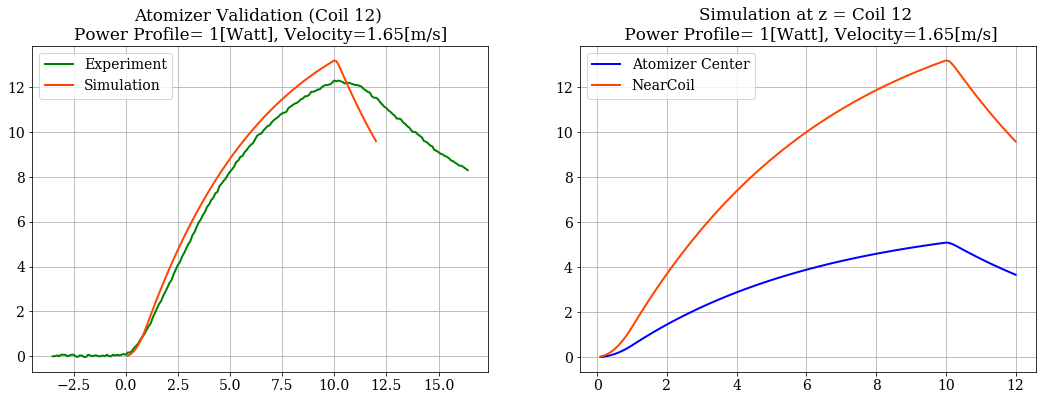

In [17]:
pyplot.figure(figsize=(18,6))
pyplot.subplot(1, 2, 1)
pyplot.title('Atomizer Validation (Coil 12) \nPower Profile= 1[Watt], Velocity=1.65[m/s]')
pyplot.plot(data_exp1W_165lm['time[s]']-3.5, data_exp1W_165lm['Temperature[C]']-21.766667,label='Experiment', color="green",linewidth="2")
pyplot.plot(time, dataSim["coil12_nearcoil [K]"]- 293.149994, label='Simulation', color="orangered",linewidth="2")
pyplot.legend()
pyplot.grid()
pyplot.subplot(1, 2, 2)
pyplot.title('Simulation at z = Coil 12 \n Power Profile= 1[Watt], Velocity=1.65[m/s]')
pyplot.plot(time, dataSim["coil12_Center [K]"]- 293.149994, label='Atomizer Center', color="blue",linewidth="2")
pyplot.plot(time, dataSim["coil12_nearcoil [K]"]- 293.149994, label='NearCoil', color="orangered",linewidth="2")
# pyplot.plot(time, dataSim["coil12_oncoil [K]"]- 293.149994,label='OnCoil')
pyplot.legend()
pyplot.grid()

### Analysis - Start
Heated Airflow Model, Inlet Velocity = 0.5L/min, Applied Power =  1Watt (linear increase for 1 second),timestep = 0.1[s]  

In [18]:
dataExp = pd.read_csv("data_exp/exp_1W_0.5LPM.csv")
dataSim = pd.read_csv("data_sim/data_vel05_prof.csv")

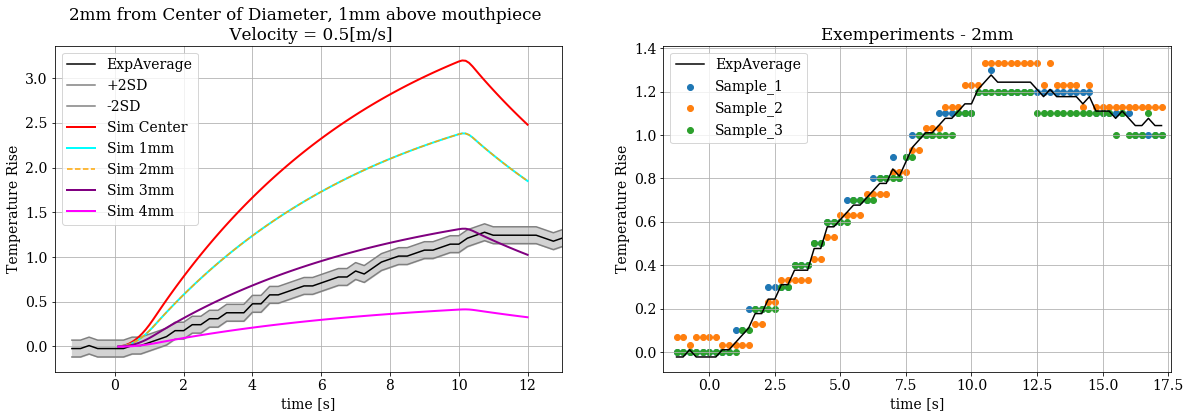

In [19]:
pyplot.figure(figsize=(20,6))
pyplot.subplot(1, 2, 1)
pyplot.title('2mm from Center of Diameter, 1mm above mouthpiece \n Velocity = 0.5[m/s]')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(data_time[75:150]-20, average2,linestyle='-',label="ExpAverage",color="black")
pyplot.plot(data_time[75:150]-20, plus2,linestyle='-',color="gray",label="+2SD",)
pyplot.plot(data_time[75:150]-20, minus2,linestyle='-',color="gray",label="-2SD",)
pyplot.fill_between(data_time[75:150]-20,plus2, minus2, color="lightgray")
pyplot.plot(dataSim["Time [s]"], dataSim['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="Sim Center",color="red",linewidth="2")
pyplot.plot(dataSim["Time [s]"], dataSim['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="Sim 1mm",color="cyan",linewidth="2")
pyplot.plot(dataSim["Time [s]"], dataSim['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="Sim 2mm",color="orange",linestyle="dashed")
pyplot.plot(dataSim["Time [s]"], dataSim['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="Sim 3mm",color="purple",linewidth="2")
pyplot.plot(dataSim["Time [s]"], dataSim['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="Sim 4mm",color="magenta",linewidth="2")
pyplot.xlim([-1.75, 13])
pyplot.legend()
pyplot.grid()
pyplot.subplot(1, 2, 2)
pyplot.title('Exemperiments - 2mm')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[0])[75:150],label="Sample_1")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[1])[75:150],label="Sample_2")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T1[2])[75:150],label="Sample_3")
pyplot.plot(data_time[75:150]-20, average2,linestyle='-',label="ExpAverage",color="black")
# pyplot.plot(dataSim["Time [s]"], dataSim['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="Sim Center 0.5m/s",color="red")
pyplot.xlim([-1.75, 17.6])
pyplot.legend()
pyplot.grid()

### Analysis - Smaller timestep = 0.01[s]
Heated Airflow Model, Inlet Velocity = 0.5L/min, Applied Power =  1Watt (linear increase for 1 second),timestep = 0.01[s]  

In [20]:
dataExp = pd.read_csv("data_exp/exp_1W_0.5LPM.csv")
dataSim01 = pd.read_csv("data_sim/data_ALL_v05_t01.csv")

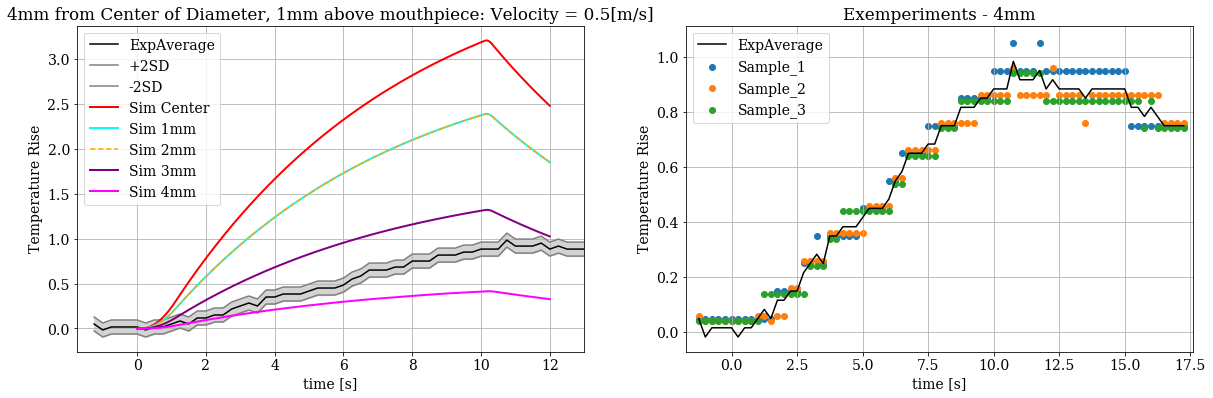

In [21]:
pyplot.figure(figsize=(20,6))
pyplot.subplot(1, 2, 1)
pyplot.title('4mm from Center of Diameter, 1mm above mouthpiece: Velocity = 0.5[m/s]')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(data_time[75:150]-20, average4,linestyle='-',label="ExpAverage",color="black")
pyplot.plot(data_time[75:150]-20, plus4,linestyle='-',color="gray",label="+2SD",)
pyplot.plot(data_time[75:150]-20, minus4,linestyle='-',color="gray",label="-2SD",)
pyplot.fill_between(data_time[75:150]-20,plus4, minus4, color="lightgray")
pyplot.plot(dataSim01["Time [s]"], dataSim01['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="Sim Center",color="red",linewidth="2")
pyplot.plot(dataSim01["Time [s]"], dataSim01['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="Sim 1mm",color="cyan",linewidth="2")
pyplot.plot(dataSim01["Time [s]"], dataSim01['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="Sim 2mm",color="orange",linestyle="dashed")
pyplot.plot(dataSim01["Time [s]"], dataSim01['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="Sim 3mm",color="purple",linewidth="2")
pyplot.plot(dataSim01["Time [s]"], dataSim01['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="Sim 4mm",color="magenta",linewidth="2")
pyplot.xlim([-1.75, 13])
pyplot.legend()
pyplot.grid()
pyplot.subplot(1, 2, 2)
pyplot.title('Exemperiments - 4mm')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[0])[75:150],label="Sample_1")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[1])[75:150],label="Sample_2")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[2])[75:150],label="Sample_3")
pyplot.plot(data_time[75:150]-20, average4,linestyle='-',label="ExpAverage",color="black")
# pyplot.plot(dataSim["Time [s]"], dataSim['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="Sim Center 0.5m/s",color="red")
pyplot.xlim([-1.75, 17.6])
pyplot.legend()
pyplot.grid()

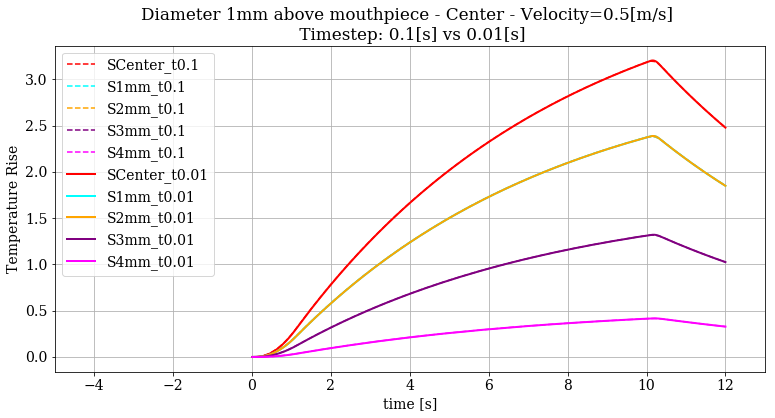

In [22]:
pyplot.figure(figsize=(28,6))
pyplot.subplot(1, 2, 1)
pyplot.title('Diameter 1mm above mouthpiece - Center - Velocity=0.5[m/s] \n Timestep: 0.1[s] vs 0.01[s]')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(dataSim["Time [s]"], dataSim['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter_t0.1",color="red",linestyle="dashed")
pyplot.plot(dataSim["Time [s]"], dataSim['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_t0.1",color="cyan",linestyle="dashed")
pyplot.plot(dataSim["Time [s]"], dataSim['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_t0.1",color="orange",linestyle="dashed")
pyplot.plot(dataSim["Time [s]"], dataSim['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_t0.1",color="purple",linestyle="dashed")
pyplot.plot(dataSim["Time [s]"], dataSim['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_t0.1",color="magenta",linestyle="dashed")

pyplot.plot(dataSim01["Time [s]"], dataSim01['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter_t0.01",color="red",linewidth="2")
pyplot.plot(dataSim01["Time [s]"], dataSim01['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_t0.01",color="cyan",linewidth="2")
pyplot.plot(dataSim01["Time [s]"], dataSim01['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_t0.01",color="orange",linewidth="2")
pyplot.plot(dataSim01["Time [s]"], dataSim01['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_t0.01",color="purple",linewidth="2")
pyplot.plot(dataSim01["Time [s]"], dataSim01['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_t0.01",color="magenta",linewidth="2")

pyplot.xlim([-5, 13])
pyplot.legend()
pyplot.grid()


### Analysis - Vel = 0.514775 [m/sec])

In [23]:
dataExp = pd.read_csv("data_exp/exp_1W_0.5LPM.csv")
dataSim514 = pd.read_csv("data_sim/data_ALL_v0514_t01.csv")

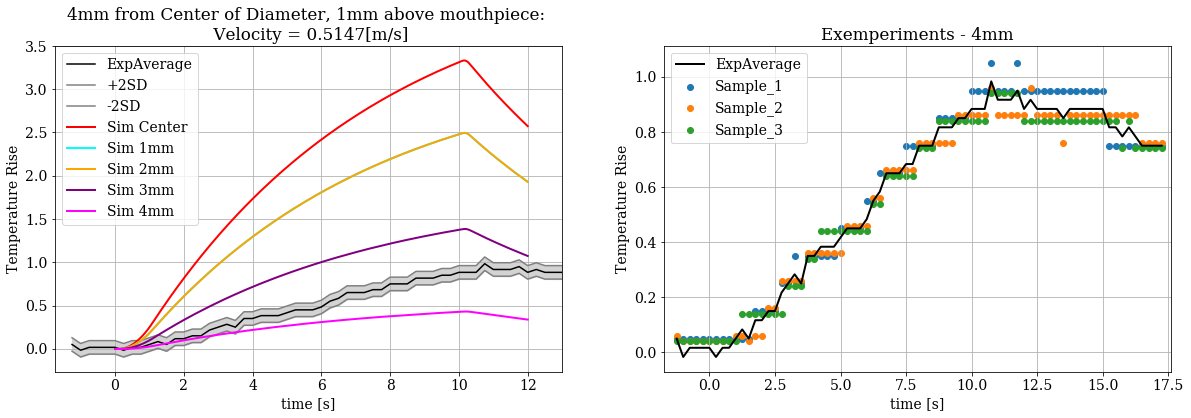

In [24]:
pyplot.figure(figsize=(20,6))
pyplot.subplot(1, 2, 1)
pyplot.title('4mm from Center of Diameter, 1mm above mouthpiece: \n Velocity = 0.5147[m/s]')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(data_time[75:150]-20, average4,linestyle='-',label="ExpAverage",color="black")
pyplot.plot(data_time[75:150]-20, plus4,linestyle='-',color="gray",label="+2SD",)
pyplot.plot(data_time[75:150]-20, minus4,linestyle='-',color="gray",label="-2SD",)
pyplot.fill_between(data_time[75:150]-20,plus4, minus4, color="lightgray")
pyplot.plot(dataSim514["Time [s]"], dataSim514['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="Sim Center",color="red",linewidth="2")
pyplot.plot(dataSim514["Time [s]"], dataSim514['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="Sim 1mm",color="cyan",linewidth="2")
pyplot.plot(dataSim514["Time [s]"], dataSim514['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="Sim 2mm",color="orange",linewidth="2")
pyplot.plot(dataSim514["Time [s]"], dataSim514['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="Sim 3mm",color="purple",linewidth="2")
pyplot.plot(dataSim514["Time [s]"], dataSim514['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="Sim 4mm",color="magenta",linewidth="2")

pyplot.xlim([-1.75, 13])
pyplot.legend()
pyplot.grid()
pyplot.subplot(1, 2, 2)
pyplot.title('Exemperiments - 4mm')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[0])[75:150],label="Sample_1")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[1])[75:150],label="Sample_2")
pyplot.scatter(data_time[75:150]-20, np.abs(data_Exp1W_05lm_T4[2])[75:150],label="Sample_3")
pyplot.plot(data_time[75:150]-20, average4,linestyle='-',label="ExpAverage",color="black",linewidth="2")
# pyplot.plot(dataSim["Time [s]"], dataSim['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="Sim Center 0.5m/s",color="red")
pyplot.xlim([-1.75, 17.6])
pyplot.legend()
pyplot.grid()

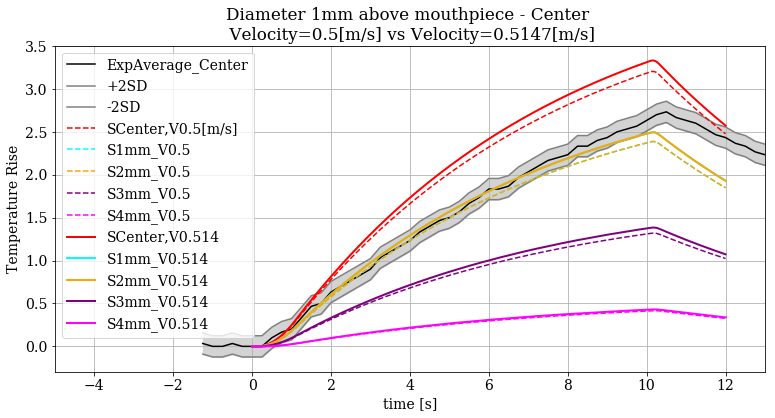

In [25]:
pyplot.figure(figsize=(28,6))
pyplot.subplot(1, 2, 1)
pyplot.title('Diameter 1mm above mouthpiece - Center \n Velocity=0.5[m/s] vs Velocity=0.5147[m/s]')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(data_time[75:150]-20, average0,linestyle='-',label="ExpAverage_Center",color="black")
pyplot.plot(data_time[75:150]-20, plus0,linestyle='-',color="gray",label="+2SD",)
pyplot.plot(data_time[75:150]-20, minus0,linestyle='-',color="gray",label="-2SD",)
pyplot.fill_between(data_time[75:150]-20,plus0, minus0, color="lightgray")

pyplot.plot(dataSim01["Time [s]"], dataSim01['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter,V0.5[m/s]",color="red",linestyle="dashed")
pyplot.plot(dataSim01["Time [s]"], dataSim01['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_V0.5",color="cyan",linestyle="dashed")
pyplot.plot(dataSim01["Time [s]"], dataSim01['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_V0.5",color="orange",linestyle="dashed")
pyplot.plot(dataSim01["Time [s]"], dataSim01['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_V0.5",color="purple",linestyle="dashed")
pyplot.plot(dataSim01["Time [s]"], dataSim01['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_V0.5",color="magenta",linestyle="dashed")

pyplot.plot(dataSim514["Time [s]"], dataSim514['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter,V0.514",color="red",linewidth="2")
pyplot.plot(dataSim514["Time [s]"], dataSim514['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_V0.514",color="cyan",linewidth="2")
pyplot.plot(dataSim514["Time [s]"], dataSim514['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_V0.514",color="orange",linewidth="2")
pyplot.plot(dataSim514["Time [s]"], dataSim514['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_V0.514",color="purple",linewidth="2")
pyplot.plot(dataSim514["Time [s]"], dataSim514['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_V0.514",color="magenta",linewidth="2")

pyplot.xlim([-5, 13])
pyplot.legend()
pyplot.grid()


### Analysis - CURRENT (Applied Power Profile for different durations)

In [97]:
dataExp = pd.read_csv("data_exp/exp_1W_0.5LPM.csv")
dataSimPowerOn1Off1   = pd.read_csv("data_sim/output_on1s_off1s.csv")
dataSimPowerOn15Off1  = pd.read_csv("data_sim/output_on1.5s_off1s.csv")
dataSimPowerOn05Off02 = pd.read_csv("data_sim/output_on0.5s_off0.2s.csv")
dataSimPowerOn2Off2 = pd.read_csv("data_sim/output_on2s_off2s.csv")
dataSimPowerOn4Off2 = pd.read_csv("data_sim/output_on4s_off2s.csv")
dataSimPowerOn2Off2V0528 = pd.read_csv("data_sim/output_on2s_off2s_v0528256.csv")

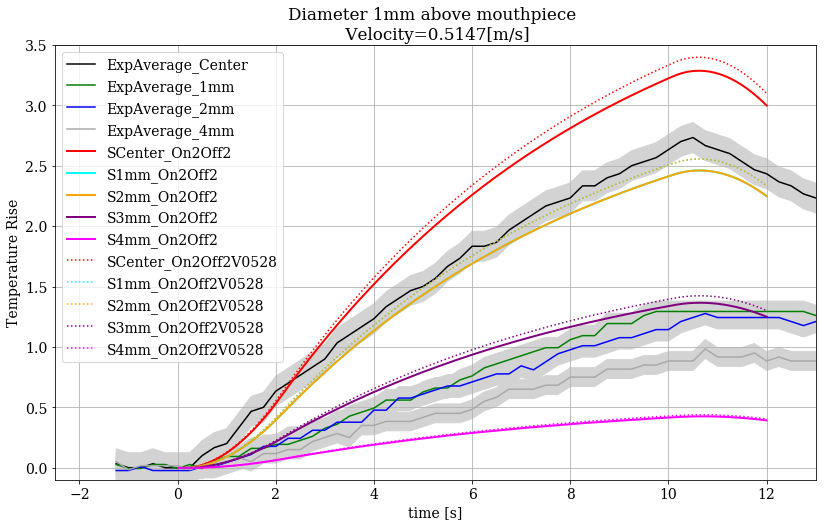

In [147]:
pyplot.figure(figsize=(30,8))
pyplot.subplot(1, 2, 1)
pyplot.title('Diameter 1mm above mouthpiece \n Velocity=0.5147[m/s]')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(data_time[75:150]-20, average0,linestyle='-',label="ExpAverage_Center",color="black")
# pyplot.plot(data_time[75:150]-20, plus0,linestyle='-',color="gray",label="+2SD",)
# pyplot.plot(data_time[75:150]-20, minus0,linestyle='-',color="gray",label="-2SD",)
pyplot.fill_between(data_time[75:150]-20,plus0, minus0, color="lightgray")
pyplot.plot(data_time[75:150]-20, average1,linestyle='-',label="ExpAverage_1mm",color="green")
pyplot.fill_between(data_time[75:150]-20,plus1, minus1, color="lightgray")
pyplot.plot(data_time[75:150]-20, average2,linestyle='-',label="ExpAverage_2mm",color="blue")
pyplot.fill_between(data_time[75:150]-20,plus2, minus2, color="lightgray")
pyplot.plot(data_time[75:150]-20, average4,linestyle='-',label="ExpAverage_4mm",color="darkgray")
pyplot.fill_between(data_time[75:150]-20,plus4, minus4, color="lightgray")


# pyplot.plot(dataSimPowerOn05Off02["Time [s]"], dataSimPowerOn05Off02['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter_On05Off02",color="red",linestyle="dotted")
# pyplot.plot(dataSimPowerOn05Off02["Time [s]"], dataSimPowerOn05Off02['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_On05Off02",color="cyan")#,linestyle="dotted")
# pyplot.plot(dataSimPowerOn05Off02["Time [s]"], dataSimPowerOn05Off02['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_On05Off02",color="orange") #,linestyle="dotted")
# pyplot.plot(dataSimPowerOn05Off02["Time [s]"], dataSimPowerOn05Off02['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_On05Off02",color="purple",linestyle="dotted")
# pyplot.plot(dataSimPowerOn05Off02["Time [s]"], dataSimPowerOn05Off02['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_On05Off02",color="magenta",linestyle="dotted")

# pyplot.plot(dataSimPowerOn1Off1["Time [s]"], dataSimPowerOn1Off1['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter_On1Off1",color="red",linestyle="dashed")
# pyplot.plot(dataSimPowerOn1Off1["Time [s]"], dataSimPowerOn1Off1['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_On1Off1",color="cyan",linestyle="dashed")
# pyplot.plot(dataSimPowerOn1Off1["Time [s]"], dataSimPowerOn1Off1['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_On1Off1",color="orange",linestyle="dashed")
# pyplot.plot(dataSimPowerOn1Off1["Time [s]"], dataSimPowerOn1Off1['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_On1Off1",color="purple",linestyle="dashed")
# pyplot.plot(dataSimPowerOn1Off1["Time [s]"], dataSimPowerOn1Off1['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_On1Off1",color="magenta",linestyle="dashed")

# pyplot.plot(dataSimPowerOn15Off1["Time [s]"], dataSimPowerOn15Off1['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter_On1.5Off1",color="red",linestyle="dashdot")
# pyplot.plot(dataSimPowerOn15Off1["Time [s]"], dataSimPowerOn15Off1['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_On1.5Off1",color="cyan",linestyle="dashdot")
# pyplot.plot(dataSimPowerOn15Off1["Time [s]"], dataSimPowerOn15Off1['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_On1.5Off1",color="orange",linestyle="dashdot")
# pyplot.plot(dataSimPowerOn15Off1["Time [s]"], dataSimPowerOn15Off1['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_On1.5Off1",color="purple",linestyle="dashdot")
# pyplot.plot(dataSimPowerOn15Off1["Time [s]"], dataSimPowerOn15Off1['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_On1.5Off1",color="magenta",linestyle="dashdot")

pyplot.plot(dataSimPowerOn2Off2["Time [s]"], dataSimPowerOn2Off2['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter_On2Off2",color="red",linewidth="2")
pyplot.plot(dataSimPowerOn2Off2["Time [s]"], dataSimPowerOn2Off2['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_On2Off2",color="cyan",linewidth="2")
pyplot.plot(dataSimPowerOn2Off2["Time [s]"], dataSimPowerOn2Off2['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_On2Off2",color="orange",linewidth="2")
pyplot.plot(dataSimPowerOn2Off2["Time [s]"], dataSimPowerOn2Off2['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_On2Off2",color="purple",linewidth="2")
pyplot.plot(dataSimPowerOn2Off2["Time [s]"], dataSimPowerOn2Off2['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_On2Off2",color="magenta",linewidth="2")

# pyplot.plot(dataSimPowerOn4Off2["Time [s]"], dataSimPowerOn4Off2['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter_On4Off2",color="orangered")#,linestyle="dotted")
# pyplot.plot(dataSimPowerOn4Off2["Time [s]"], dataSimPowerOn4Off2['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_On4Off2",color="blue",linestyle="dotted")
# pyplot.plot(dataSimPowerOn4Off2["Time [s]"], dataSimPowerOn4Off2['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_On4Off2",color="orangered",linestyle="dotted")
# pyplot.plot(dataSimPowerOn4Off2["Time [s]"], dataSimPowerOn4Off2['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_On4Off2",color="purple",linestyle="dotted")
# pyplot.plot(dataSimPowerOn4Off2["Time [s]"], dataSimPowerOn4Off2['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_On4Off2",color="magenta",linestyle="dotted")

pyplot.plot(dataSimPowerOn2Off2V0528["Time [s]"], dataSimPowerOn2Off2V0528['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter_On2Off2V0528",color="red",linestyle="dotted")
pyplot.plot(dataSimPowerOn2Off2V0528["Time [s]"], dataSimPowerOn2Off2V0528['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_On2Off2V0528",color="cyan",linestyle="dotted")
pyplot.plot(dataSimPowerOn2Off2V0528["Time [s]"], dataSimPowerOn2Off2V0528['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_On2Off2V0528",color="orange",linestyle="dotted")
pyplot.plot(dataSimPowerOn2Off2V0528["Time [s]"], dataSimPowerOn2Off2V0528['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_On2Off2V0528",color="purple",linestyle="dotted")
pyplot.plot(dataSimPowerOn2Off2V0528["Time [s]"], dataSimPowerOn2Off2V0528['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_On2Off2V0528",color="magenta",linestyle="dotted")

pyplot.xlim([-2.5, 13])
pyplot.ylim([-0.1, 3.5])
pyplot.legend()
pyplot.grid()


### Analysis - CURRENT (Adiabatic, HTC = 0, HTC = 100) - Test Run [ERRORS]
For this analysis, Power On = 2sec, Power Off = 2sec, Inlet Airflow = 0.5L/min, Applied Power = 1Watt

In [28]:
dataExp = pd.read_csv("data_exp/exp_1W_0.5LPM.csv")
dataSimAdiab  = pd.read_csv("data_sim/Walls_adiabatic.csv")
dataSimHTC0   = pd.read_csv("data_sim/Walls_HT0.csv")
dataSimHTC100 = pd.read_csv("data_sim/Walls_HT100.csv")

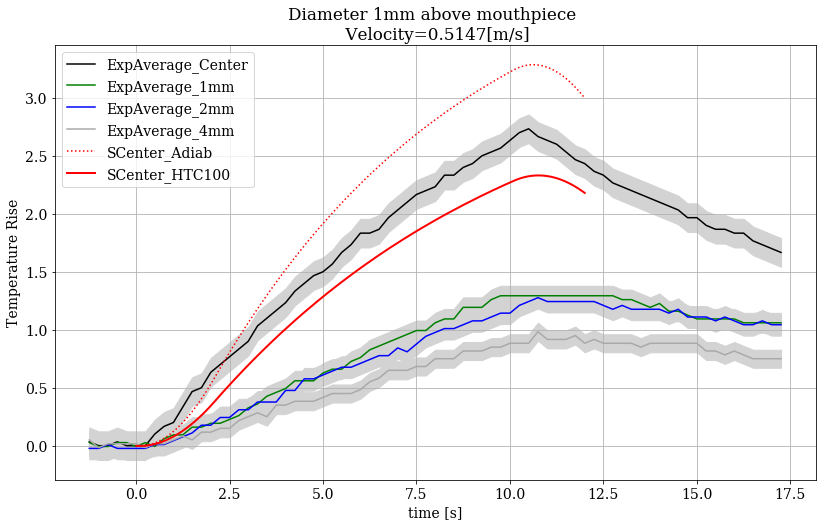

In [33]:
pyplot.figure(figsize=(30,8))
pyplot.subplot(1, 2, 1)
pyplot.title('Diameter 1mm above mouthpiece \n Velocity=0.5147[m/s]')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
pyplot.plot(data_time[75:150]-20, average0,linestyle='-',label="ExpAverage_Center",color="black")
# pyplot.plot(data_time[75:150]-20, plus0,linestyle='-',color="gray",label="+2SD",)
# pyplot.plot(data_time[75:150]-20, minus0,linestyle='-',color="gray",label="-2SD",)
pyplot.fill_between(data_time[75:150]-20,plus0, minus0, color="lightgray")
pyplot.plot(data_time[75:150]-20, average1,linestyle='-',label="ExpAverage_1mm",color="green")
pyplot.fill_between(data_time[75:150]-20,plus1, minus1, color="lightgray")
pyplot.plot(data_time[75:150]-20, average2,linestyle='-',label="ExpAverage_2mm",color="blue")
pyplot.fill_between(data_time[75:150]-20,plus2, minus2, color="lightgray")
pyplot.plot(data_time[75:150]-20, average4,linestyle='-',label="ExpAverage_4mm",color="darkgray")
pyplot.fill_between(data_time[75:150]-20,plus4, minus4, color="lightgray")

pyplot.plot(dataSimAdiab["Time [s]"], dataSimAdiab['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter_Adiab",color="red",linestyle="dotted")
# pyplot.plot(dataSimAdiab["Time [s]"], dataSimAdiab['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_Adiab",color="cyan",linestyle="dotted")
# pyplot.plot(dataSimAdiab["Time [s]"], dataSimAdiab['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_Adiab",color="orange",linestyle="dotted")
# pyplot.plot(dataSimAdiab["Time [s]"], dataSimAdiab['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_Adiab",color="purple",linestyle="dotted")
# pyplot.plot(dataSimAdiab["Time [s]"], dataSimAdiab['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_Adiab",color="magenta",linestyle="dotted")

# pyplot.plot(dataSimHTC0["Time [s]"], dataSimHTC0['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter_HTC0",color="red",linestyle="dashed")
# pyplot.plot(dataSimHTC0["Time [s]"], dataSimHTC0['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_HTC0",color="cyan",linestyle="dashed")
# pyplot.plot(dataSimHTC0["Time [s]"], dataSimHTC0['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_HTC0",color="orange",linestyle="dashed")
# pyplot.plot(dataSimHTC0["Time [s]"], dataSimHTC0['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_HTC0",color="purple",linestyle="dashed")
# pyplot.plot(dataSimHTC0["Time [s]"], dataSimHTC0['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_HTC0",color="magenta",linestyle="dashed")

pyplot.plot(dataSimHTC100["Time [s]"], dataSimHTC100['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter_HTC100",color="red",linewidth="2")
# pyplot.plot(dataSimHTC100["Time [s]"], dataSimHTC100['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_HTC100",color="cyan",linewidth="2")
# pyplot.plot(dataSimHTC100["Time [s]"], dataSimHTC100['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_HTC100",color="orange",linewidth="2")
# pyplot.plot(dataSimHTC100["Time [s]"], dataSimHTC100['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_HTC100",color="purple",linewidth="2")
# pyplot.plot(dataSimHTC100["Time [s]"], dataSimHTC100['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_HTC100",color="magenta",linewidth="2")

# pyplot.xlim([-2.5, 13])
# pyplot.ylim([-0.1, 3.5])
pyplot.legend()
pyplot.grid()

### Analysis - CURRENT (Adiabatic, HTC = 0, HTC = 100) - Test Run 2
For this analysis, Power On = 2sec, Power Off = 2sec, Inlet Airflow = 0.5L/min, Applied Power = 1Watt

In [34]:
dataExp = pd.read_csv("data_exp/exp_1W_0.5LPM.csv")
dataSimAdiab  = pd.read_csv("data_sim/Walls_adiabatic_1.csv")
dataSimHTC0   = pd.read_csv("data_sim/Walls_HT0_1.csv")
dataSimHTC100 = pd.read_csv("data_sim/Walls_HT100_1.csv")

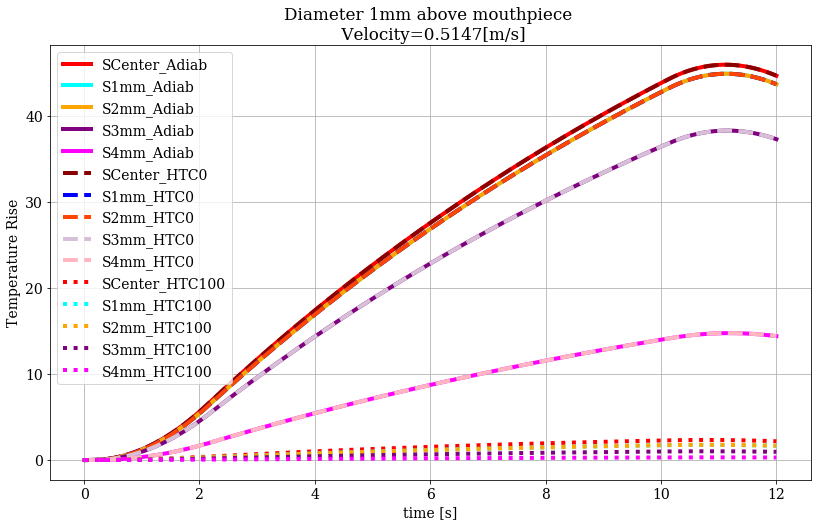

In [82]:
pyplot.figure(figsize=(30,8))
pyplot.subplot(1, 2, 1)
pyplot.title('Diameter 1mm above mouthpiece \n Velocity=0.5147[m/s]')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
# pyplot.plot(data_time[75:150]-19.5, average0,linestyle='-',label="ExpAverage_Center",color="black")
# # pyplot.plot(data_time[75:150]-20, plus0,linestyle='-',color="gray",label="+2SD",)
# # pyplot.plot(data_time[75:150]-20, minus0,linestyle='-',color="gray",label="-2SD",)
# pyplot.fill_between(data_time[75:150]-19.5,plus0, minus0, color="lightgray")
# pyplot.plot(data_time[75:150]-19.5, average1,linestyle='-',label="ExpAverage_1mm",color="green")
# pyplot.fill_between(data_time[75:150]-19.5,plus1, minus1, color="lightgray")
# pyplot.plot(data_time[75:150]-20, average2,linestyle='-',label="ExpAverage_2mm",color="blue")
# pyplot.fill_between(data_time[75:150]-19.5,plus2, minus2, color="lightgray")
# pyplot.plot(data_time[75:150]-20, average4,linestyle='-',label="ExpAverage_4mm",color="darkgray")
# pyplot.fill_between(data_time[75:150]-19.5,plus4, minus4, color="lightgray")

pyplot.plot(dataSimAdiab["Time [s]"], dataSimAdiab['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter_Adiab",color="red",linewidth=4)
pyplot.plot(dataSimAdiab["Time [s]"], dataSimAdiab['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_Adiab",color="cyan",linewidth=4)
pyplot.plot(dataSimAdiab["Time [s]"], dataSimAdiab['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_Adiab",color="orange",linewidth=4)
pyplot.plot(dataSimAdiab["Time [s]"], dataSimAdiab['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_Adiab",color="purple",linewidth=4)
pyplot.plot(dataSimAdiab["Time [s]"], dataSimAdiab['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_Adiab",color="magenta",linewidth=4)

pyplot.plot(dataSimHTC0["Time [s]"], dataSimHTC0['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter_HTC0",color="darkred",linestyle="dashed",linewidth=4)
pyplot.plot(dataSimHTC0["Time [s]"], dataSimHTC0['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_HTC0",color="blue",linestyle="dashed",linewidth=4)
pyplot.plot(dataSimHTC0["Time [s]"], dataSimHTC0['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_HTC0",color="orangered",linestyle="dashed",linewidth=4)
pyplot.plot(dataSimHTC0["Time [s]"], dataSimHTC0['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_HTC0",color="thistle",linestyle="dashed",linewidth=4)
pyplot.plot(dataSimHTC0["Time [s]"], dataSimHTC0['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_HTC0",color="lightpink",linestyle="dashed",linewidth=4)

pyplot.plot(dataSimHTC100["Time [s]"], dataSimHTC100['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter_HTC100",color="red",linestyle="dotted",linewidth=4)
pyplot.plot(dataSimHTC100["Time [s]"], dataSimHTC100['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_HTC100",color="cyan",linestyle="dotted",linewidth=4)
pyplot.plot(dataSimHTC100["Time [s]"], dataSimHTC100['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_HTC100",color="orange",linestyle="dotted",linewidth=4)
pyplot.plot(dataSimHTC100["Time [s]"], dataSimHTC100['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_HTC100",color="purple",linestyle="dotted",linewidth=4)
pyplot.plot(dataSimHTC100["Time [s]"], dataSimHTC100['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_HTC100",color="magenta",linestyle="dotted",linewidth=4)

# pyplot.xlim([-2.5, 13])
# pyplot.ylim([-0.1, 3.5])
pyplot.legend()
pyplot.grid()

### Analysis - CURRENT (Temp = 20 vs Temp = 25) - Instead of Adiabatic
For this analysis, Power On = 2sec, Power Off = 2sec, Inlet Airflow = 0.5L/min, Applied Power = 1Watt

In [77]:
dataExp = pd.read_csv("data_exp/exp_1W_0.5LPM.csv")
dataSimAdiab  = pd.read_csv("data_sim/Walls_adiabatic_1.csv")
dataSimT20   = pd.read_csv("data_sim/Walls_T20.csv")
dataSimT25   = pd.read_csv("data_sim/Walls_T25.csv")
# dataSimT25   = pd.read_csv("data_sim/Walls_T25_all.csv")
# dataSimHTC100 = pd.read_csv("data_sim/Walls_HT100_1.csv")

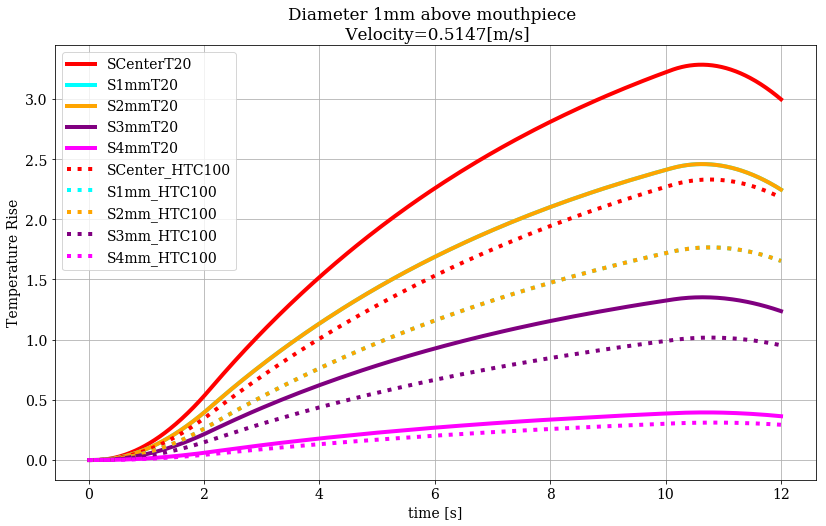

In [85]:
pyplot.figure(figsize=(30,8))
pyplot.subplot(1, 2, 1)
pyplot.title('Diameter 1mm above mouthpiece \n Velocity=0.5147[m/s]')
pyplot.xlabel('time [s]')
pyplot.ylabel('Temperature Rise')
# pyplot.plot(data_time[75:150]-19.5, average0,linestyle='-',label="ExpAverage_Center",color="black",linewidth=4)
# # pyplot.plot(data_time[75:150]-20, plus0,linestyle='-',color="gray",label="+2SD",)
# # pyplot.plot(data_time[75:150]-20, minus0,linestyle='-',color="gray",label="-2SD",)
# pyplot.fill_between(data_time[75:150]-19.5,plus0, minus0, color="lightgray")
# pyplot.plot(data_time[75:150]-19.5, average1,linestyle='-',label="ExpAverage_1mm",color="green",linewidth=4)
# pyplot.fill_between(data_time[75:150]-19.5,plus1, minus1, color="lightgray")
# pyplot.plot(data_time[75:150]-20, average2,linestyle='-',label="ExpAverage_2mm",color="blue",linewidth=4)
# pyplot.fill_between(data_time[75:150]-19.5,plus2, minus2, color="lightgray")
# pyplot.plot(data_time[75:150]-20, average4,linestyle='-',label="ExpAverage_4mm",color="darkgray",linewidth=4)
# pyplot.fill_between(data_time[75:150]-19.5,plus4, minus4, color="lightgray")

# pyplot.plot(dataSimAdiab["Time [s]"], dataSimAdiab['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter_Adiab",color="red",linewidth=4)
# pyplot.plot(dataSimAdiab["Time [s]"], dataSimAdiab['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_Adiab",color="cyan",linewidth=4)
# pyplot.plot(dataSimAdiab["Time [s]"], dataSimAdiab['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_Adiab",color="orange",linewidth=4)
# pyplot.plot(dataSimAdiab["Time [s]"], dataSimAdiab['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_Adiab",color="purple",linewidth=4)
# pyplot.plot(dataSimAdiab["Time [s]"], dataSimAdiab['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_Adiab",color="magenta",linewidth=4)

# pyplot.plot(dataSimHTC0["Time [s]"], dataSimHTC0['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter_HTC0",color="darkred",linestyle="dashed",linewidth=4)
# pyplot.plot(dataSimHTC0["Time [s]"], dataSimHTC0['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_HTC0",color="blue",linestyle="dashed",linewidth=4)
# pyplot.plot(dataSimHTC0["Time [s]"], dataSimHTC0['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_HTC0",color="orangered",linestyle="dashed",linewidth=4)
# pyplot.plot(dataSimHTC0["Time [s]"], dataSimHTC0['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_HTC0",color="thistle",linestyle="dashed",linewidth=4)
# pyplot.plot(dataSimHTC0["Time [s]"], dataSimHTC0['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_HTC0",color="lightpink",linestyle="dashed",linewidth=4)

pyplot.plot(dataSimT20["Time [s]"], dataSimT20['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenterT20",color="red",linewidth=4) #,linestyle="dashed"
pyplot.plot(dataSimT20["Time [s]"], dataSimT20['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mmT20",color="cyan",linewidth=4) #,linestyle="dashed"
pyplot.plot(dataSimT20["Time [s]"], dataSimT20['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mmT20",color="orange",linewidth=4) #,linestyle="dashed"
pyplot.plot(dataSimT20["Time [s]"], dataSimT20['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mmT20",color="purple",linewidth=4) #,linestyle="dashed"
pyplot.plot(dataSimT20["Time [s]"], dataSimT20['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mmT20",color="magenta",linewidth=4) #,linestyle="dashed"

# pyplot.plot(dataSimT25["Time [s]"], dataSimT25['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-298.152039,label="SCenterT25",color="black",linewidth=4,linestyle="dashed")
# pyplot.plot(dataSimT25["Time [s]"], dataSimT25['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-298.152039,label="S1mmT25",color="black",linewidth=4,linestyle="dashed")
# pyplot.plot(dataSimT25["Time [s]"], dataSimT25['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-298.152039,label="S2mmT25",color="black",linewidth=4,linestyle="dashed")
# pyplot.plot(dataSimT25["Time [s]"], dataSimT25['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-298.152039,label="S3mmT25",color="black",linewidth=4,linestyle="dashed")
# pyplot.plot(dataSimT25["Time [s]"], dataSimT25['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-298.152039,label="S4mmT25",color="black",linewidth=4,linestyle="dashed")

pyplot.plot(dataSimHTC100["Time [s]"], dataSimHTC100['Monitor Point: MouthpieceAbove1mm0mmTemp (Temperature) [K]']-293.152039,label="SCenter_HTC100",color="red",linestyle="dotted",linewidth=4)
pyplot.plot(dataSimHTC100["Time [s]"], dataSimHTC100['Monitor Point: MouthpieceAbove1mm1mmTemp (Temperature) [K]']-293.152039,label="S1mm_HTC100",color="cyan",linestyle="dotted",linewidth=4)
pyplot.plot(dataSimHTC100["Time [s]"], dataSimHTC100['Monitor Point: MouthpieceAbove1mm2mmTemp (Temperature) [K]']-293.152039,label="S2mm_HTC100",color="orange",linestyle="dotted",linewidth=4)
pyplot.plot(dataSimHTC100["Time [s]"], dataSimHTC100['Monitor Point: MouthpieceAbove1mm3mmTemp (Temperature) [K]']-293.152039,label="S3mm_HTC100",color="purple",linestyle="dotted",linewidth=4)
pyplot.plot(dataSimHTC100["Time [s]"], dataSimHTC100['Monitor Point: MouthpieceAbove1mm4mmTemp (Temperature) [K]']-293.152039,label="S4mm_HTC100",color="magenta",linestyle="dotted",linewidth=4)

# pyplot.xlim([-2.5, 13])
# pyplot.ylim([-0.1, 3.5])
pyplot.legend()
pyplot.grid()